In [1]:
import numpy as np 
import matplotlib.pyplot as plt
from necklace_model import Necklace
from simulated_annealing import Annealer
%load_ext snakeviz
import time

In [3]:
# Set the main variables
N = 100 # Ensemble size
n = 100000 # Number of temperature steps

### Problem 2a
Given an infinite temperature, the metropolis algorithm accepts any new state of the necklace. Therefore the simulated annealing, with a constant infinite temperature, is equal to a random search and can only result in the global minimum if the algorithm directly hits it (with luck).

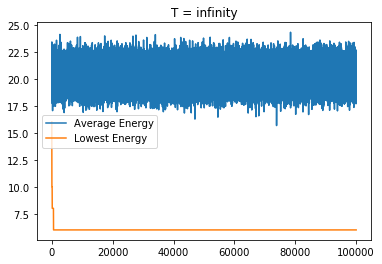

In [4]:
temps = np.repeat(np.inf,n)
nkl = Necklace(20,2)
anl = Annealer()
anl.set_model(nkl)
anl.set_temps(temps)
energyArr,energyVBSF = anl.run(N)
plt.plot(energyArr,label='Average Energy')
plt.plot(energyVBSF,label='Lowest Energy')
plt.legend()
plt.title('T = infinity')
plt.savefig('plots/problem2a.png')

### Problem 2b
At zero temperature, the metropolis algorithm only accepts new states with smaller energy. Hence the energy decreases directly, but might be trapped in a local minimum. If the global minimum can only be reached with going up a hill, the algorithm will never find it.

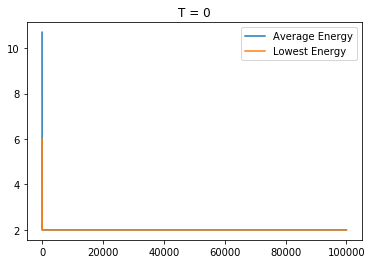

In [5]:
temps = np.repeat(0,n)
nkl = Necklace(20,2)
anl = Annealer()
anl.set_model(nkl)
anl.set_temps(temps)
energyArr,energyVBSFArr = anl.run(N)
plt.plot(energyArr,label='Average Energy')
plt.plot(energyVBSFArr,label='Lowest Energy')
plt.legend()
plt.title('T = 0')
plt.savefig('plots/problem2b.png')

### Problem 2c
We use the boundaries $T(t=0) = 40$ and $T(t=99999) = 0.5$ to calculate the values of $a,b$. The exponential decay of the temperature gives the annealing process some time to jump over "hills" in the energy landscape, but gets very small for higher time steps. Hence in the end it is not possible to jump away from a local minimum and get to the global one.

In [ ]:
temps = np.linspace(0,n,n)
b = -np.max(temps)/np.log(0.5/40)
temps = 40*np.exp(-temps/b)
plt.plot(temps,label = 'Temperature')
nkl = Necklace(20,2)
anl = Annealer()
anl.set_model(nkl)
anl.set_temps(temps)
%snakeviz energyArr,energyVBSFArr = anl.run(n)
plt.plot(energyArr, label = 'Average Energy')
plt.plot(energyVBSFArr, label='Lowest energy')
plt.legend()
plt.savefig('plots/problem2c.png')

### Problem 2d
$a,b$ are calculated by the boundary conditions as above. 

In [ ]:
temps = np.linspace(0,n,n)
b = 39.5/(0.5*np.max(temps))
temps = 40/(1+b*temps)
plt.plot(temps,label = 'Temperature')
nkl = Necklace(20,2)
anl = Annealer()
anl.set_model(nkl)
anl.set_temps(temps)
energyArr,energyVBSFArr = anl.run(n)
plt.plot(energyArr, label = 'Average Energy')
plt.plot(energyVBSFArr, label='Lowest energy')
plt.legend()
plt.savefig('plots/problem2d.png')

### Problem 2e

In [ ]:
temps = np.linspace(0,n,n)
b = 39.5/(0.5*np.log(np.max(temps)+1))
temps = 40/(1+b*np.log(temps+1))
plt.plot(temps,label = 'Temperature')
nkl = Necklace(20,2)
anl = Annealer()
anl.set_model(nkl)
anl.set_temps(temps)
%snakeviz energyArr,energyVBSFArr = anl.run(n)
plt.plot(energyArr, label = 'Average Energy')
plt.plot(energyVBSFArr, label='Lowest energy')
plt.legend()
plt.savefig('plots/problem2e.png')

## Temperature plots


In [ ]:
temps = np.linspace(0,n,n)
b = -np.max(temps)/np.log(0.5/40)
temps_c = 40*np.exp(-temps/b)
b = 39.5/(0.5*np.max(temps))
temps_d = 40/(1+b*temps)
b = 39.5/(0.5*np.log(np.max(temps)+1))
temps_e = 40/(1+b*np.log(temps+1))

plt.plot(temps_c,label='c')
plt.plot(temps_d,label='d')
plt.plot(temps_e,label='e')